In [ ]:
from google.colab import drive
from tensorflow.keras.utils import *
drive.mount('/content/drive')

Mounted at /content/drive


# Constant

In [ ]:
# data
n_x = 8
n_y = 16
num_classes = 2

# Load data

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/vector/300K_finnal/300k_128_v1.csv")
data = data.drop("id", axis=1)
print(data)

             x_0       x_1       x_2  ...     x_126     x_127  label
0      -0.057301 -0.131848 -0.149351  ...  0.118481 -0.038009      0
1      -0.033826 -0.112631 -0.142421  ...  0.118682 -0.037872      0
2      -0.381809 -0.608369 -0.795248  ...  0.202040  0.318203      0
3      -0.029657 -0.130883 -0.118576  ...  0.135965 -0.053067      0
4      -0.040448 -0.137627 -0.134520  ...  0.092670 -0.022898      0
...          ...       ...       ...  ...       ...       ...    ...
358068 -0.142522 -1.687090 -0.765267  ...  0.504851 -0.251070      1
358069 -0.180918 -1.563458 -0.789462  ...  0.423372 -0.224895      1
358070 -0.156021 -0.367497 -0.422166  ...  0.432526 -0.078718      1
358071 -0.069032 -0.263589 -0.250879  ...  0.298864 -0.045351      1
358072 -0.150921 -1.576422 -0.804099  ...  0.476960 -0.215818      1

[358073 rows x 129 columns]


# process data

In [ ]:
import numpy as np
label = data["label"].to_numpy()
label = np.reshape(label, (label.shape[0], 1))
label = to_categorical(label, num_classes = num_classes)
feature = data.drop("label", axis=1).to_numpy()
arr = []
for i in feature:
  arr.append(np.reshape(i, (n_x, n_y)).tolist())
feature = np.array(arr)

print(label.shape, feature.shape)
print(label)

(358073, 2) (358073, 8, 16)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Split train-test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state = 42, test_size = split_size,shuffle = True)
print(y_test)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Create model

In [ ]:
pip install tensorflow-gpu 

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization

classifier = Sequential()
classifier.add(SimpleRNN(512, input_shape=(X_train.shape[1:]), return_sequences=True))
classifier.add(SimpleRNN(256,return_sequences=True ))
classifier.add(SimpleRNN(128,return_sequences=True ))
classifier.add(SimpleRNN(64,return_sequences=False ))
classifier.add(Dropout(0.2))
classifier.add(Dense(num_classes))
classifier.add(Activation('softmax'))
classifier.compile( loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'] )

# Training

In [ ]:
import time
classifier.summary()
t1 = time.time()
history = classifier.fit(x=X_train, y=y_train,batch_size=128,
                    epochs=50, validation_split = split_size, shuffle=True)
t2 = time.time()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 8, 512)            270848    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 8, 256)            196864    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 8, 128)            49280     
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                

# Test

In [ ]:
t3 = time.time()
test_loss, test_acc = classifier.evaluate(X_test, y_test)
t4 = time.time()
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2238/2238 [==============================] - 11s 5ms/step - loss: 0.0595 - accuracy: 0.9803
Test Loss: 0.05950707942247391
Test Accuracy: 0.980311393737793


# Report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

y_pred = classifier.predict(X_test)
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)



target_name = ['clean', 'malware']
print(classification_report(label_true, label_pred, target_names = target_name))

matrix = confusion_matrix(label_true, label_pred)

print(matrix)

print("\n\n")

print("\n---detail----\n")


print("---precision--- ")
print("macro : ", precision_score(label_true, label_pred, average='macro'))
print("micro : ", precision_score(label_true, label_pred, average='micro'))
print("weighted : ", precision_score(label_true, label_pred, average='weighted'))
print("each class : ", precision_score(label_true, label_pred, average=None))

print("\n---recall--- ")
print("macro : ", recall_score(label_true, label_pred, average='macro'))
print("micro : ", recall_score(label_true, label_pred, average='micro'))
print("weighted : ", recall_score(label_true, label_pred, average='weighted'))
print("each class : ", recall_score(label_true, label_pred, average=None))

print("\n---f1 score--- ")
print("macro : ", f1_score(label_true, label_pred, average='macro'))
print("micro : ", f1_score(label_true, label_pred, average='micro'))
print("weighted : ", f1_score(label_true, label_pred, average='weighted'))
print("each class : ", f1_score(label_true, label_pred, average=None))

print("\n---Acc score--- ")
print(accuracy_score(label_true, label_pred))
print("\n---FPR score--- ")
print(matrix[1][0]/(matrix[1][0]+matrix[1][1]))
print("\n---matrix--- ")
print(matrix)
print("\n---time--- ")
print("train", t2-t1)
print("test", t4-t3)


              precision    recall  f1-score   support

       clean       0.98      0.99      0.99     57625
     malware       0.96      0.93      0.95     13990

    accuracy                           0.98     71615
   macro avg       0.97      0.96      0.97     71615
weighted avg       0.98      0.98      0.98     71615

[[57150   475]
 [  935 13055]]




---detail----

---precision--- 
macro :  0.9743978658337766
micro :  0.9803113872792013
weighted :  0.9801892811243412
each class :  [0.9839029  0.96489283]

---recall--- 
macro :  0.9624617987127464
micro :  0.9803113872792013
weighted :  0.9803113872792013
each class :  [0.99175705 0.93316655]

---f1 score--- 
macro :  0.9682894491893326
micro :  0.9803113872792013
weighted :  0.980185974159316
each class :  [0.98781436 0.94876453]

---Acc score--- 
0.9803113872792013

---FPR score--- 
0.06683345246604717

---matrix--- 
[[57150   475]
 [  935 13055]]

---time--- 
train 2311.4203486442566
test 11.051667928695679


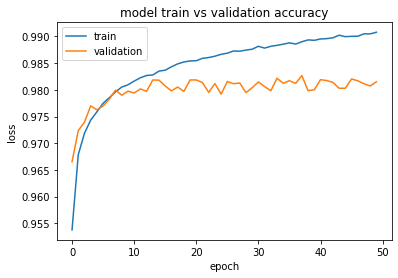

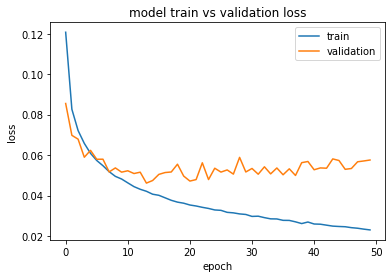

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()